# 00. Table of Contents

**01. Notebook Setup**

**02. File Import + Checks + Cleanup**

**03. Data Exploration + Answering Key Business Questions** 

    - 03.00 Crosstabs in Python (Exercise 4.10 Lesson)
    - 03.01 Regional Analysis
    - 03.02 Removing Exclusions from Data

**Script continued in 4.10.2 Task - Part 1**

# 01. Notebook Setup

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create quick path to project folder

projpath = r'/Users/laineyodette/Documents/_proDocs/professional development/Learning/Learning - Data Analytics/CareerFoundry - Become a Data Analyst/Data Immersion Course/A4 - Python Fundamentals for Data Analysts/Submitted Tasks/2024-01 Instacart Basket Analysis'

# 02. File Import + Checks + Cleanup

#### Step 1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.

## File Import

In [3]:
# Import orders_products_all.pkl data file

df_all = pd.read_pickle(os.path.join(projpath, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

## DF Checks

In [4]:
# Check dimensions of new df - should have (32404859, 34) for shape

df_all.shape

(32404859, 34)

**Confirmed** Import pulled in correctly (rows/columns)

In [5]:
# Check output - view current column headers

df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customers_first_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,Number_of_Dependants,Family_Status,income,_merge
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
# Check data types for each column

df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   order_id                    int64   
 1   user_id                     object  
 2   order_number                int64   
 3   orders_day_of_week          int64   
 4   order_hour_of_day           int64   
 5   days_since_prior_order      float64 
 6   customers_first_order       int64   
 7   product_id                  int64   
 8   add_to_cart_order           int64   
 9   reordered                   int64   
 10  product_name                object  
 11  aisle_id                    int64   
 12  department_id               int64   
 13  prices                      float64 
 14  price_range_loc             object  
 15  busiest_day                 object  
 16  busiest_days                object  
 17  busiest_period_of_day       object  
 18  max_order                   int64   
 19

#### Step 2 - Consider any security implications that might exist for this new data.

## DF Cleanup

In [7]:
# Remove current 'First Name' column from df due to PII

df_all = df_all.drop(columns = ['First Name'])

In [8]:
# Remove current 'Last Name' column from df due to PII

df_all = df_all.drop(columns = ['Last Name'])

In [9]:
# Remove current 'busiest_day ' column from df due to no longer needed since will use busiest day**s** column instead for analysis

df_all = df_all.drop(columns = ['busiest_day'])

In [10]:
# Verify column headers of ords_prods df to confirm (3) columns have been removed

for col in df_all.columns:
    print(col)

order_id
user_id
order_number
orders_day_of_week
order_hour_of_day
days_since_prior_order
customers_first_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
price_range_loc
busiest_days
busiest_period_of_day
max_order
loyalty_flag
avg_prod_price
spending_flag
median_days_since_purchase
frequency_flag
Gender
State
Age
date_joined
Number_of_Dependants
Family_Status
income
_merge


**Confirmed** PII and unnecessary columns removed.

In [11]:
# Change the data type of the user_id column in customer df to string and override as new type

df_all['order_id'] = df_all['order_id'].astype('str')

In [12]:
# Check to ensure data type change has occurred

df_all['order_id'].dtype

dtype('O')

In [13]:
# Verify shape after all consistency and quality checks

df_all.shape

(32404859, 31)

# 03. Data Exploration + Answering Key Business Questions

## 03.00 Crosstabs in Python (Exercise 4.10 Lesson)

In [23]:
# Create a crosstab to check whether the assumption is true that orders without any "days since prior order" are because the line item is for the customer's first order

crosstab = pd.crosstab(df_all['days_since_prior_order'], df_all['order_number'], dropna = False)

In [25]:
# Copy the resulting crosstab into the clipboard for transfer into Excel

crosstab.to_clipboard()

## 03.01 Regional Analysis

#### Step 3 - Create a regional segmentation of the data. Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [14]:
# Create a "Region" function to populate with what region the customer is in by state

result = []

for value in df_all['State']:
    if value in ('Maine', 'New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        result.append('South')
    elif value in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        result.append('West')
    else:
        result.append('Unknown')

**Source for Regional Categorization** Wikipedia

https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [15]:
# Check result of for-loop

result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [16]:
# Populate region into new 'Region' column

df_all['Region'] = result

In [17]:
# Check count on each value in new 'Region' column - ensure all states were categorized and no 'Unknown' values

df_all['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [18]:
# Verify all records were classified - ensure region totals equal 32404859 (number of rows in df)

10791885 + 8292913 + 7597325 + 5722736

32404859

**Confirmed** All results included and all records have been classified into region based on their state

In [19]:
# Create a crosstab to act as a pivot for analysis

pivot_region_spending = pd.crosstab(df_all['Region'], df_all['spending_flag'], dropna = False)

In [20]:
# View results of crosstab creation

pivot_region_spending

spending_flag,High spender,Low spender
Region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


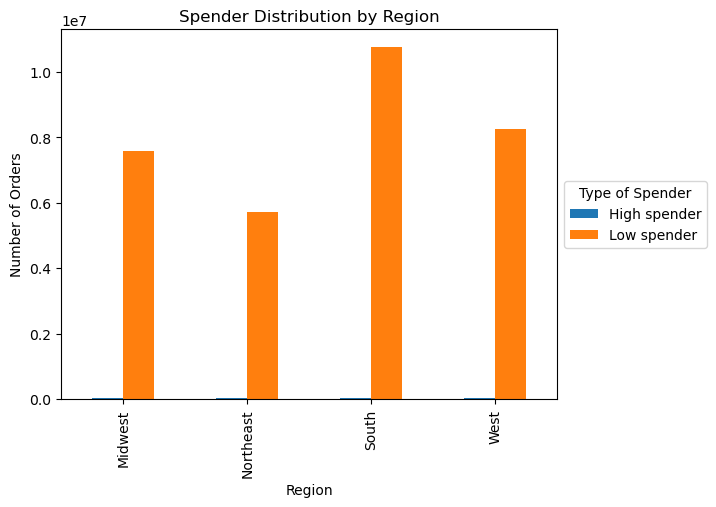

In [26]:
# Create clustered bar chart by region and spending

bar_region_spender = pivot_region_spending.plot.bar()

# Add labels and a title and put titled legend next to chart

bar_region_spender.set(xlabel='Region', ylabel='Number of Orders', title='Spender Distribution by Region')
bar_region_spender.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Type of Spender')

**Observations**

**Q:** Is there a difference in spending habits between the different regions?

**A:** It appears that the majority of spenders are "low" in all regions. The Southern region has the highest number of customers overall.

In [27]:
# Export the bar chart to my files

bar_region_spender.figure.savefig(os.path.join(projpath, '04 Analysis','Visualizations', 'bar_region_spender'), bbox_inches = 'tight')

## 03.02 Removing Exclusions from Data

#### Step 4 - Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 

In [24]:
# Create a new column that hosts a flag for low-activity customers based on max number of orders ('max_order' column)

df_all.loc[df_all['max_order'] >= 5, 'exclusion_flag'] = 'Include'
df_all.loc[df_all['max_order'] < 5, 'exclusion_flag'] = 'Exclude'

In [25]:
# Check the counts of each flag

df_all['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Include    30964564
Exclude     1440295
Name: count, dtype: int64

In [26]:
# Verify all records were classified - ensure flag totals equal 32404859 (number of rows in df)

30964564 + 1440295

32404859

**Confirmed** All results included and all records have been classified based on their number of orders

In [27]:
# Verify that the results are expected

df_all[['max_order', 'exclusion_flag']].head()

,max_order,exclusion_flag
0,10,Include
1,10,Include
2,10,Include
3,10,Include
4,10,Include


In [28]:
# Verify that the results are expected

df_all[['max_order', 'exclusion_flag']].tail()

,max_order,exclusion_flag
32404854,26,Include
32404855,4,Exclude
32404856,4,Exclude
32404857,4,Exclude
32404858,4,Exclude


**Confirmed** Exclusion flag function worked as expected

In [29]:
# Create subset df of all rows to exclude (customers who have ordered < 5 times)

df_all_exclude = df_all[df_all['exclusion_flag'] == 'Exclude']

In [30]:
# Check shape of subset df

df_all_exclude.shape

(1440295, 33)

In [31]:
# Export the subset df for records as pickle file to Prepared Data folder

df_all_exclude.to_pickle(os.path.join(projpath, '02 Data', 'Prepared Data', 'orders_products_exclusions.pkl'))

In [32]:
# Remove exclusions from primary dataframe (create new filtered df with only "include" rows)

df_all_include = df_all[df_all['exclusion_flag'] == 'Include']

In [33]:
# Check shape of subset df

df_all_include.shape

(30964564, 33)

**Note** Size of df_all_exclude (1440295) and size of df_all_include (30964564) match the numbers produced when counting the exclusion flags. Therefore, all records have been successfully separated into the 'inclue' and 'exclude' dfs.

In [34]:
# Export new merged dataframe as pickle file to Prepared Data folder

df_all_include.to_pickle(os.path.join(projpath, '02 Data', 'Prepared Data', 'orders_products_include.pkl'))

**Script continues in 4.10 Task - Part 1.2**